In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a DL2022 folder and put all the files under HW2 folder, then 'DL2022/HW2'
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'DL2022/HW2'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'HW2'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['knn.py', 'usefuns', '__pycache__', 'knn.ipynb']


In [ ]:
['knn.py', 'knn.ipynb', 'usefuns']

['knn.py', 'knn.ipynb', 'usefuns']

In [ ]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

import time, os
os.environ["TZ"] = "CUT"
time.tzset()

from knn import hello
hello()

knn_path = os.path.join(GOOGLE_DRIVE_PATH, 'knn.py')
knn_edit_time = time.ctime(os.path.getmtime(knn_path))
print('knn.py last edited on %s' % knn_edit_time)

Hello from knn.py!
knn.py last edited on Thu Feb 23 14:32:28 2023


In [ ]:
from usefuns import data
from usefuns import vis
import torch
import torchvision
import matplotlib.pyplot as plt
import statistics

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16

In [ ]:
x_train, y_train, x_test, y_test = data.cifar10() 

print('Training set:', )
print('  data shape:', x_train.shape)
print('  labels shape: ', y_train.shape)
print('Test set:')
print('  data shape: ', x_test.shape)
print('  labels shape', y_test.shape)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Training set:
  data shape: torch.Size([50000, 3, 32, 32])
  labels shape:  torch.Size([50000])
Test set:
  data shape:  torch.Size([10000, 3, 32, 32])
  labels shape torch.Size([10000])


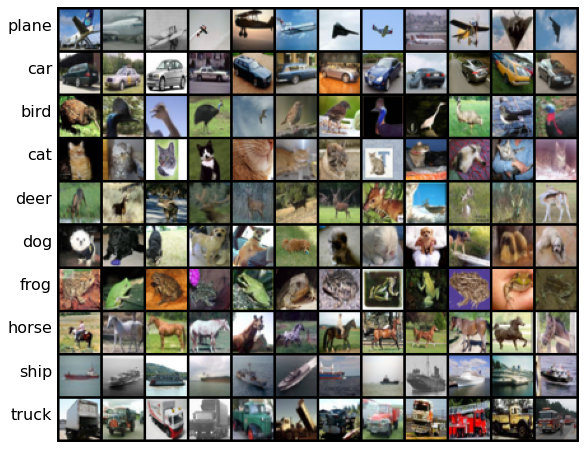

In [ ]:
import random
from torchvision.utils import make_grid

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 12
samples = []
for y, cls in enumerate(classes):
    plt.text(-4, 34 * y + 18, cls, ha='right')
    idxs, = (y_train == y).nonzero(as_tuple=True)
    for i in range(samples_per_class):
        idx = idxs[random.randrange(idxs.shape[0])].item()
        samples.append(x_train[idx])
img = torchvision.utils.make_grid(samples, nrow=samples_per_class)
plt.imshow(vis.tensor_to_image(img))  
plt.axis('off')
plt.show()

In [ ]:
help(data.cifar10) 

Help on function cifar10 in module usefuns.data:

cifar10(num_train=None, num_test=None)
    Return the CIFAR10 dataset, automatically downloading it if necessary.
    This function can also subsample the dataset.
    
    Inputs:
    - num_train: [Optional] How many samples to keep from the training set.
      If not provided, then keep the entire training set.
    - num_test: [Optional] How many samples to keep from the test set.
      If not provided, then keep the entire test set.
    
    Returns:
    - x_train: float32 tensor of shape (num_train, 3, 32, 32)
    - y_train: int64 tensor of shape (num_train, 3, 32, 32)
    - x_test: float32 tensor of shape (num_test, 3, 32, 32)
    - y_test: int64 tensor of shape (num_test, 3, 32, 32)



In [ ]:
num_train = 500
num_test = 250

x_train, y_train, x_test, y_test = data.cifar10(num_train, num_test)  

print('Training set:', )
print('  data shape:', x_train.shape)
print('  labels shape: ', y_train.shape)
print('Test set:')
print('  data shape: ', x_test.shape)
print('  labels shape', y_test.shape)

Training set:
  data shape: torch.Size([500, 3, 32, 32])
  labels shape:  torch.Size([500])
Test set:
  data shape:  torch.Size([250, 3, 32, 32])
  labels shape torch.Size([250])


In [ ]:
import torch
import statistics

In [ ]:
def compute_distances_two_loops(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training
  set and each element of the test set. Images should be flattened and treated
  as vectors.

  This implementation uses a naive set of nested loops over the training and
  test data.

  The input data may have any number of dimensions -- for example this function
  should be able to compute nearest neighbor between vectors, in which case
  the inputs will have shape (num_{train, test}, D); it should alse be able to
  compute nearest neighbors between images, where the inputs will have shape
  (num_{train, test}, C, H, W). More generally, the inputs will have shape
  (num_{train, test}, D1, D2, ..., Dn); you should flatten each element
  of shape (D1, D2, ..., Dn) into a vector of shape (D1 * D2 * ... * Dn) before
  computing distances.

  The input tensors should not be modified.

  NOTE: Your implementation may not use `torch.norm`, `torch.dist`,
  `torch.cdist`, or their instance method variants x.norm / x.dist / x.cdist.
  You may not use any functions from torch.nn or torch.nn.functional.

  Inputs:
  - x_train: Torch tensor of shape (num_train, D1, D2, ...)
  - x_test: Torch tensor of shape (num_test, D1, D2, ...)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point. It should have the same dtype as x_train.
  """
  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function using a pair of nested loops over the        #
  # training data and the test data.                                           #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  ##############################################################################
  # Replace "pass" statement with your code
  for train_idx in range(num_train):
    for test_idx in range(num_test):
      dists[train_idx, test_idx] = torch.square(x_train[train_idx]-x_test[test_idx]).sum() #直接計算每組訓練和測試樣本的平方和
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists

In [ ]:
torch.manual_seed(0)
num_train = 500
num_test = 250
x_train, y_train, x_test, y_test = data.cifar10(num_train, num_test) 

dists = compute_distances_two_loops(x_train, x_test)
print('dists has shape: ', dists.shape)

dists has shape:  torch.Size([500, 250])


In [ ]:
def compute_distances_one_loop(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training
  set and each element of the test set. Images should be flattened and treated
  as vectors.

  This implementation uses only a single loop over the training data.

  Similar to compute_distances_two_loops, this should be able to handle inputs
  with any number of dimensions. The inputs should not be modified.

  NOTE: Your implementation may not use `torch.norm`, `torch.dist`,
  `torch.cdist`, or their instance method variants x.norm / x.dist / x.cdist.
  You may not use any functions from torch.nn or torch.nn.functional.

  Inputs:
  - x_train: Torch tensor of shape (num_train, D1, D2, ...)
  - x_test: Torch tensor of shape (num_test, D1, D2, ...)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  """
  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function using only a single loop over x_train.       #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  ##############################################################################
  # Replace "pass" statement with your code
  x_train = x_train.reshape(num_train, -1)
  x_test = x_test.reshape(num_test, -1) # 把x_test陣列轉換成一個(100,768)的二維陣列
  for i in range(num_train):
    dists[i] = torch.sum((x_test - x_train[i])**2, dim=1).t() #把每個樣本(x_test-x_train)的所有特徵做平方和的運算，再將結果轉置
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists

In [ ]:
torch.manual_seed(0)
x_train_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)
x_test_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)

dists_one = compute_distances_one_loop(x_train_rand, x_test_rand)
dists_two = compute_distances_two_loops(x_train_rand, x_test_rand)
difference = (dists_one - dists_two).pow(2).sum().sqrt().item()
print('Difference: ', difference)
if difference < 1e-4:
    print('Good! The distance matrices match')
else:
    print('Uh-oh! The distance matrices are different')

Difference:  0.0
Good! The distance matrices match


In [ ]:
def compute_distances_no_loops(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training
  set and each element of the test set. Images should be flattened and treated
  as vectors.

  This implementation should not use any Python loops. For memory-efficiency,
  it also should not create any large intermediate tensors; in particular you
  should not create any intermediate tensors with O(num_train*num_test)
  elements.

  Similar to compute_distances_two_loops, this should be able to handle inputs
  with any number of dimensions. The inputs should not be modified.

  NOTE: Your implementation may not use `torch.norm`, `torch.dist`,
  `torch.cdist`, or their instance method variants x.norm / x.dist / x.cdist.
  You may not use any functions from torch.nn or torch.nn.functional.
  Inputs:
  - x_train: Torch tensor of shape (num_train, C, H, W)
  - x_test: Torch tensor of shape (num_test, C, H, W)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  """
  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function without using any explicit loops and without #
  # creating any intermediate tensors with O(num_train * num_test) elements.   #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  #                                                                            #
  # HINT: Try to formulate the Euclidean distance using two broadcast sums     #
  #       and a matrix multiply.                                               #
  ##############################################################################
  # Replace "pass" statement with your code
  x_test = x_test.reshape(num_test, -1) # 把x_test陣列轉換成一個(100,768)的二維陣列
  x_train = x_train.reshape(num_train, -1)
  dists = torch.sum(x_train**2, dim=1).reshape(-1, 1) + torch.sum(x_test **2, dim=1).reshape(1, -1) - 2*torch.mm(x_train, x_test.t()) 
  # 先計算x_train的平方和，再計算x_test的平方和，接著使用torch.mm(x_train, x_test.t())計算內積，
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists

In [ ]:
torch.manual_seed(0)
x_train_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)
x_test_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)

dists_two = compute_distances_two_loops(x_train_rand, x_test_rand)
dists_none = compute_distances_no_loops(x_train_rand, x_test_rand)
difference = (dists_two - dists_none).pow(2).sum().sqrt().item()
print('Difference: ', difference)
if difference < 1e-4:
  print('Good! The distance matrices match')
else:
  print('Uh-oh! The distance matrices are different')

Difference:  1.8915795349851643e-11
Good! The distance matrices match


In [ ]:
def predict_labels(dists, y_train, k=1):
  """
  Given distances between all pairs of training and test samples, predict a
  label for each test sample by taking a **majority vote** among its k nearest
  neighbors in the training set.

  In the event of a tie, this function **should** return the smallest label. For
  example, if k=5 and the 5 nearest neighbors to a test example have labels
  [1, 2, 1, 2, 3] then there is a tie between 1 and 2 (each have 2 votes), so
  we should return 1 since it is the smallest label.

  This function should not modify any of its inputs.

  Inputs:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  - y_train: Torch tensor of shape (num_train,) giving labels for all training
    samples. Each label is an integer in the range [0, num_classes - 1]
  - k: The number of nearest neighbors to use for classification.

  Returns:
  - y_pred: A torch int64 tensor of shape (num_test,) giving predicted labels
    for the test data, where y_pred[j] is the predicted label for the jth test
    example. Each label should be an integer in the range [0, num_classes - 1].
  """
  num_train, num_test = dists.shape
  y_pred = torch.zeros(num_test, dtype=torch.int64)
  ##############################################################################
  # TODO: Implement this function. You may use an explicit loop over the test  #
  # samples. Hint: Look up the function torch.topk                             #
  ##############################################################################
  # Replace "pass" statement with your code
  for i in range(num_test):
    values, indices = torch.topk(dists[:, i], k, largest=False)#計算i行前k個最小的值，i行前k個最小的值在原始張量中的索引(0,1,3)(2,3,4)(0,2,4)
    values, indices = y_train[indices].unique(return_counts=True)#計算y_train[indices]中所有不同的元素以及每個元素所出現的次數011 012 002 1,2 1,1,1 2,1
    y_pred[i] = values[indices.argmax()]#indices.argmax()找到indices中與最大索引對應的元素的位置，values[]找到對應位置的值(1, 0, 0)
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return y_pred

In [ ]:
torch.manual_seed(0)
dists = torch.tensor([
    [0.3, 0.4, 0.1],
    [0.1, 0.5, 0.5],
    [0.4, 0.1, 0.2],
    [0.2, 0.2, 0.4],
    [0.5, 0.3, 0.3],
])
y_train = torch.tensor([0, 1, 0, 1, 2])
y_pred_expected = torch.tensor([1, 0, 0])
y_pred = predict_labels(dists, y_train, k=3)
correct = y_pred.tolist() == y_pred_expected.tolist()
print('Correct: ', correct)

Correct:  True


In [ ]:
class KnnClassifier:
  def __init__(self, x_train, y_train):
    """
    Create a new K-Nearest Neighbor classifier with the specified training data.
    In the initializer we simply memorize the provided training data.

    Inputs:
    - x_train: Torch tensor of shape (num_train, C, H, W) giving training data
    - y_train: int64 torch tensor of shape (num_train,) giving training labels
    """
    ###########################################################################
    # TODO: Implement the initializer for this class. It should perform no    #
    # computation and simply memorize the training data.                      #
    ###########################################################################
    # Replace "pass" statement with your code
    self.x_train = x_train
    self.y_train = y_train
    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################

  def predict(self, x_test, k=1):
    """
    Make predictions using the classifier.

    Inputs:
    - x_test: Torch tensor of shape (num_test, C, H, W) giving test samples
    - k: The number of neighbors to use for predictions

    Returns:
    - y_test_pred: Torch tensor of shape (num_test,) giving predicted labels
      for the test samples.
    """
    y_test_pred = None
    ###########################################################################
    # TODO: Implement this method. You should use the functions you wrote     #
    # above for computing distances (use the no-loop variant) and to predict  #
    # output labels.
    ###########################################################################
    # Replace "pass" statement with your code
    dists = compute_distances_no_loops(self.x_train, x_test)
    y_test_pred = predict_labels(dists, self.y_train, k=k)
    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################
    return y_test_pred

  def check_accuracy(self, x_test, y_test, k=1, quiet=False):
    """
    Utility method for checking the accuracy of this classifier on test data.
    Returns the accuracy of the classifier on the test data, and also prints a
    message giving the accuracy.

    Inputs:
    - x_test: Torch tensor of shape (num_test, C, H, W) giving test samples
    - y_test: int64 torch tensor of shape (num_test,) giving test labels
    - k: The number of neighbors to use for prediction
    - quiet: If True, don't print a message.

    Returns:
    - accuracy: Accuracy of this classifier on the test data, as a percent.
      Python float in the range [0, 100]
    """
    y_test_pred = self.predict(x_test, k=k)
    num_samples = x_test.shape[0]
    num_correct = (y_test == y_test_pred).sum().item()
    accuracy = 100.0 * num_correct / num_samples
    msg = (f'Got {num_correct} / {num_samples} correct; '
           f'accuracy is {accuracy:.2f}%')
    if not quiet:
      print(msg)
    return accuracy

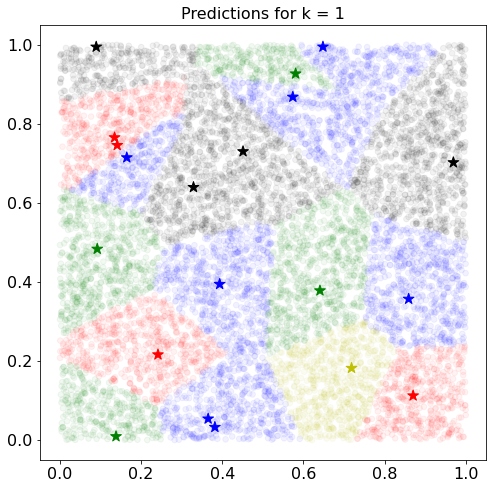

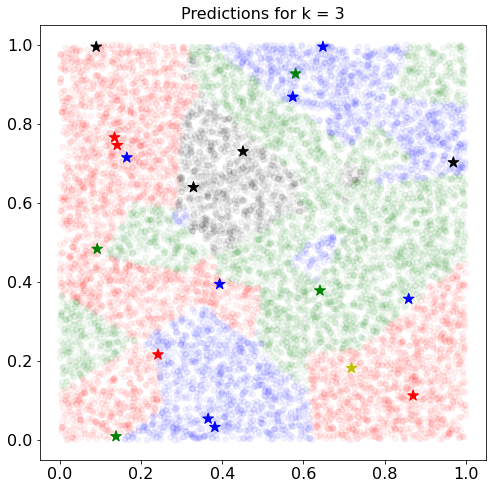

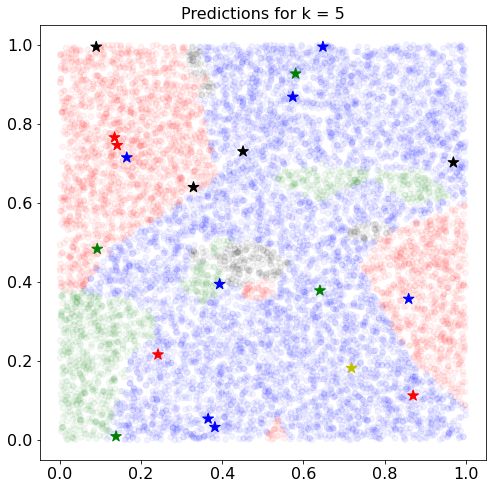

In [ ]:
num_test = 10000
num_train = 20
num_classes = 5

# Generate random training and test data
torch.manual_seed(128)
x_train = torch.rand(num_train, 2)
y_train = torch.randint(num_classes, size=(num_train,))
x_test = torch.rand(num_test, 2)
classifier = KnnClassifier(x_train, y_train)

# Plot predictions for different values of k
for k in [1, 3, 5]:
    y_test = classifier.predict(x_test, k=k)
    plt.gcf().set_size_inches(8, 8)
    class_colors = ['r', 'g', 'b', 'k', 'y']
    train_colors = [class_colors[c] for c in y_train]
    test_colors = [class_colors[c] for c in y_test]
    plt.scatter(x_test[:, 0], x_test[:, 1],
                color=test_colors, marker='o', s=32, alpha=0.05)
    plt.scatter(x_train[:, 0], x_train[:, 1],
                color=train_colors, marker='*', s=128.0)
    plt.title('Predictions for k = %d' % k, size=16)
    plt.show()

In [ ]:
torch.manual_seed(0)
num_train = 5000
num_test = 500
x_train, y_train, x_test, y_test = data.cifar10(num_train, num_test) 

classifier = KnnClassifier(x_train, y_train)
classifier.check_accuracy(x_test, y_test, k=1)

Got 137 / 500 correct; accuracy is 27.40%


27.4

In [ ]:
torch.manual_seed(0)
num_train = 5000
num_test = 500
x_train, y_train, x_test, y_test = data.cifar10(num_train, num_test) 

classifier = KnnClassifier(x_train, y_train)
classifier.check_accuracy(x_test, y_test, k=5)

Got 139 / 500 correct; accuracy is 27.80%


27.8

In [ ]:
def knn_cross_validate(x_train, y_train, num_folds=5, k_choices=None):
  """
  Perform cross-validation for KnnClassifier.

  Inputs:
  - x_train: Tensor of shape (num_train, C, H, W) giving all training data
  - y_train: int64 tensor of shape (num_train,) giving labels for training data
  - num_folds: Integer giving the number of folds to use
  - k_choices: List of integers giving the values of k to try

  Returns:
  - k_to_accuracies: Dictionary mapping values of k to lists, where
    k_to_accuracies[k][i] is the accuracy on the ith fold of a KnnClassifier
    that uses k nearest neighbors.
  """
  if k_choices is None:
    # Use default values
    k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

  # First we divide the training data into num_folds equally-sized folds.
  x_train_folds = []
  y_train_folds = []
  ##############################################################################
  # TODO: Split the training data and images into folds. After splitting,      #
  # x_train_folds and y_train_folds should be lists of length num_folds, where #
  # y_train_folds[i] is the label vector for images in x_train_folds[i].       #
  # Hint: torch.chunk                                                          #
  ##############################################################################
  # Replace "pass" statement with your code
  x_train_folds = torch.chunk(x_train, num_folds) # 將x_train沿著第一個維度均分成num_folds個相等大小的子區塊，並回傳一個包含這些子區塊的tuple
  y_train_folds = torch.chunk(y_train, num_folds) # 將y_train沿著第一個維度均分成num_folds個相等大小的子區塊，並回傳一個包含這些子區塊的tuple
  ##############################################################################
  #                            END OF YOUR CODE                                #
  ##############################################################################

  # A dictionary holding the accuracies for different values of k that we find
  # when running cross-validation. After running cross-validation,
  # k_to_accuracies[k] should be a list of length num_folds giving the different
  # accuracies we found when trying KnnClassifiers that use k neighbors.
  k_to_accuracies = {}

  ##############################################################################
  # TODO: Perform cross-validation to find the best value of k. For each value #
  # of k in k_choices, run the k-nearest-neighbor algorithm num_folds times;   #
  # in each case you'll use all but one fold as training data, and use the     #
  # last fold as a validation set. Store the accuracies for all folds and all  #
  # values in k in k_to_accuracies.   HINT: torch.cat                          #
  ##############################################################################
  # Replace "pass" statement with your code
  for k in k_choices:
    k_to_accuracies[k] = []
    for i in range(num_folds):
      fx_test = x_train_folds[i]
      fy_test = y_train_folds[i]
      fx_train = torch.cat([x_train_folds[j] for j in range(num_folds) if i != j])
      fy_train = torch.cat([y_train_folds[j] for j in range(num_folds) if i != j])
      classifier = KnnClassifier(fx_train, fy_train)
      acc = classifier.check_accuracy(fx_test, fy_test, k=k, quiet=True)
      k_to_accuracies[k].append(acc)
  #首先遍歷所有要測試的k值，對於每個k值創建一個空列表用於存儲這個k值下不同交叉驗證結果的準確率，然後遍歷每個num_folds子集，
  #torch.cat()函数將除了當前循環中i所指定的子集之外的其他子集一系列張量拼接起來，再呼叫上面寫好的KnnClassifier()函式把訓練
  #集丟進去跑，最後利用check_accuracy()函式來算出準確率，將算出來的準確率存進去k_to_accuracies[]裡。
  ##############################################################################
  #                            END OF YOUR CODE                                #
  ##############################################################################

  return k_to_accuracies

In [ ]:
torch.manual_seed(0)
num_train = 5000
num_test = 500
x_train, y_train, x_test, y_test = data.cifar10(num_train, num_test)  

k_to_accuracies = knn_cross_validate(x_train, y_train, num_folds=5)

for k, accs in sorted(k_to_accuracies.items()):
  print('k = %d got accuracies: %r' % (k, accs))

k = 1 got accuracies: [26.3, 25.7, 26.4, 27.8, 26.6]
k = 3 got accuracies: [23.9, 24.9, 24.0, 26.6, 25.4]
k = 5 got accuracies: [24.8, 26.6, 28.0, 29.2, 28.0]
k = 8 got accuracies: [26.2, 28.2, 27.3, 29.0, 27.3]
k = 10 got accuracies: [26.5, 29.6, 27.6, 28.4, 28.0]
k = 12 got accuracies: [26.0, 29.5, 27.9, 28.3, 28.0]
k = 15 got accuracies: [25.2, 28.9, 27.8, 28.2, 27.4]
k = 20 got accuracies: [27.0, 27.9, 27.9, 28.2, 28.5]
k = 50 got accuracies: [27.1, 28.8, 27.8, 26.9, 26.6]
k = 100 got accuracies: [25.6, 27.0, 26.3, 25.6, 26.3]


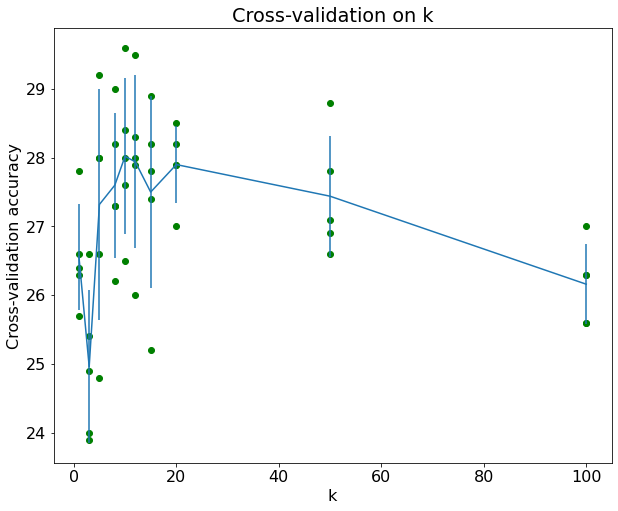

In [ ]:
ks, means, stds = [], [], []
torch.manual_seed(0)
for k, accs in sorted(k_to_accuracies.items()):
  plt.scatter([k] * len(accs), accs, color='g')
  ks.append(k)
  means.append(statistics.mean(accs))
  stds.append(statistics.stdev(accs))
plt.errorbar(ks, means, yerr=stds)
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.title('Cross-validation on k')
plt.show()

In [ ]:
def knn_get_best_k(k_to_accuracies):
  """
  Select the best value for k, from the cross-validation result from
  knn_cross_validate. If there are multiple k's available, then you SHOULD
  choose the smallest k among all possible answer.

  Inputs:
  - k_to_accuracies: Dictionary mapping values of k to lists, where
    k_to_accuracies[k][i] is the accuracy on the ith fold of a KnnClassifier
    that uses k nearest neighbors.

  Returns:
  - best_k: best (and smallest if there is a conflict) k value based on
            the k_to_accuracies info
  """
  best_k = 0
  ##############################################################################
  # TODO: Use the results of cross-validation stored in k_to_accuracies to     #
  # choose the value of k, and store the result in best_k. You should choose   #
  # the value of k that has the highest mean accuracy accross all folds.       #
  ##############################################################################
  # Replace "pass" statement with your code
  means = []
  for k, accs in sorted(k_to_accuracies.items()):
    means.append(statistics.mean(accs))
  best_k = sorted(k_to_accuracies.items())[(torch.argmax(torch.tensor(means))).item()][0]
  #先建立一個空的list來存平均的準確率，接著使用for loop找出每個k對應到的各組準確率，將各組的準確率取平均再存入list，最後將這個list中最大準確率對應到的k值取出來即為所求。
  ##############################################################################
  #                            END OF YOUR CODE                                #
  ##############################################################################
  return best_k

In [ ]:
best_k = 1
torch.manual_seed(0)

best_k = knn_get_best_k(k_to_accuracies)    
print('Best k is ', best_k)

classifier = KnnClassifier(x_train, y_train)
classifier.check_accuracy(x_test, y_test, k=best_k)

Best k is  10
Got 141 / 500 correct; accuracy is 28.20%


28.2

In [ ]:
torch.manual_seed(0)
x_train_all, y_train_all, x_test_all, y_test_all = data.cifar10() 
classifier = KnnClassifier(x_train_all, y_train_all)
classifier.check_accuracy(x_test_all, y_test_all, k=best_k)

Got 3386 / 10000 correct; accuracy is 33.86%


33.86